# Resolviendo el Pendulo Simple

El Objetivo de este Notebook es resolver la ecuación del pendulo simple para cualquier valor de ángulo.

El  movimiento de um péndulo simples es descrito a partir de la segunda ley de Newton, llegando a la  siguiente ecuación:

$$\frac{d^2\theta}{dt^2}= -\frac{l\sin\theta}{g}$$

Para resolver este problema, usaremos el método Runge-Kutta de 4ª orden. Para aplicar ese método en equaciones diferenciales de segundo orden es necesario crear una varible auxiliar  que llamaremos de  $\phi$, de forma que:
$$\frac{d\theta}{dt}=\phi$$

$$\frac{d\phi}{dt}=-\frac{l\sin\theta}{g}$$
 
 
Con esto, debemos crear una función que reciba 2 parametros, el primer parametro será un vector conteniendo los valores de  $\theta$ y $\phi$, respectivamente, y el segundo parametro el tiempo  de la iteración.


Definiendo las condiciones iniciales de la simulación:

1. Digamos que queremos de t=0s hasta 20s
2. Cosideraremos g=9.81 m/s² y l=0,4 m
3. Vamos a comezar la simulación con el pendulo parado a 90⁰ de la posición de equilibrio.

Implementando esas condiciones iniciales


## https://hub.gke2.mybinder.org/user/ipython-ipython-in-depth-dcea7617/notebooks/binder/Untitled.ipynb?kernel_name=python3

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(r,t):
    theta = r[0]
    phi = r[1]
    dtheta_dt = phi
    dphi_dt = - (g/l)*np.sin(theta)
    return np.array([dtheta_dt,dphi_dt],float)

In [4]:
tiempo_inicial = 0
tiempo_final = 20
g,l = 9.81, 0.3
r = np.array([np.pi/2,0],float)

lista_theta,lista_phi,lista_t = [],[],[]

Vamos ahora a aplicar el Runge-Kutta, definiremos $10000$ como número de pasos inicialmente.

In [5]:
N = 10000
h = (tiempo_final-tiempo_inicial)/N
t = tiempo_inicial 

while(t < tiempo_final):
        lista_t.append(t)
        lista_theta.append(r[0])
        lista_phi.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+k1/2,t+h/2)
        k3 = h*f(r+k2/2,t+h/2)
        k4 = h*f(r+k3,t+h)
        r += (1/6)*(k1+2*k2+2*k3+k4)
        t += h

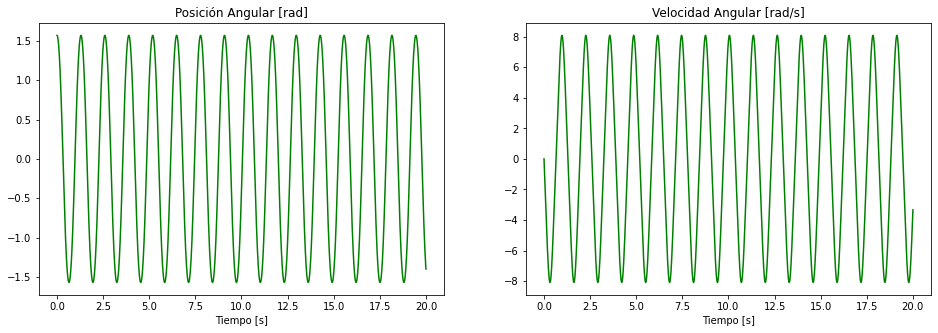

In [7]:
fig = plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.title("Posición Angular [rad]")
plt.xlabel("Tiempo [s]")
plt.plot(lista_t,lista_theta,"g")

plt.subplot(1,2,2)
plt.title("Velocidad Angular [rad/s]")
plt.xlabel("Tiempo [s]")
plt.plot(lista_t,lista_phi,"g")
plt.show()
